<a href="https://colab.research.google.com/github/corjqnrl/PatternRecognition_project/blob/main/PatternRecognition_teamproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Term Deposit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# Loading the train data
train = pd.read_csv('/content/drive/MyDrive/Pattern Recognition_lab/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Pattern Recognition_lab/test.csv')

# Train Data Exploration

In [ ]:
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,12224,46,admin.,married,high.school,unknown,no,no,telephone,jul,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,36387,32,admin.,married,university.degree,no,yes,yes,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,22703,36,technician,single,university.degree,no,no,no,cellular,aug,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,32742,30,services,single,high.school,no,yes,yes,cellular,may,...,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,40547,76,retired,divorced,basic.4y,no,no,no,cellular,aug,...,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes


In [ ]:
test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,24188,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,8688,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,35789,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,20034,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,11392,43,services,married,high.school,unknown,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8238 non-null   int64  
 1   age             8238 non-null   int64  
 2   job             8238 non-null   object 
 3   marital         8238 non-null   object 
 4   education       8238 non-null   object 
 5   default         8238 non-null   object 
 6   housing         8238 non-null   object 
 7   loan            8238 non-null   object 
 8   contact         8238 non-null   object 
 9   month           8238 non-null   object 
 10  day_of_week     8238 non-null   object 
 11  campaign        8238 non-null   int64  
 12  pdays           8238 non-null   int64  
 13  previous        8238 non-null   int64  
 14  poutcome        8238 non-null   object 
 15  emp.var.rate    8238 non-null   float64
 16  cons.price.idx  8238 non-null   float64
 17  cons.conf.idx   8238 non-null   f

In [ ]:
train.head().T

,0,1,2,3,4
id,12224,36387,22703,32742,40547
age,46,32,36,30,76
job,admin.,admin.,technician,services,retired
marital,married,married,single,single,divorced
education,high.school,university.degree,university.degree,high.school,basic.4y
default,unknown,no,no,no,no
housing,no,yes,no,yes,no
loan,no,yes,no,yes,no
contact,telephone,cellular,cellular,cellular,cellular
month,jul,jun,aug,may,aug


Feature Summary

In [ ]:
from scipy import stats

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)

    return summary

resumetable(train)

Dataset Shape: (32950, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,32950,12224,36387,22703,15.01
1,age,int64,0,76,46,32,36,5.29
2,job,object,0,12,admin.,admin.,technician,2.98
3,marital,object,0,4,married,married,single,1.32
4,education,object,0,8,high.school,university.degree,university.degree,2.56
5,default,object,0,3,unknown,no,no,0.74
6,housing,object,0,3,no,yes,no,1.14
7,loan,object,0,3,no,yes,no,0.78
8,contact,object,0,2,telephone,cellular,cellular,0.95
9,month,object,0,10,jul,jun,aug,2.65


Categorical variables : job, marital, education, default, housing, loan, contact, month, poutcome

Numerical variables : age, campaign, pdays, previous ,emp.var.rate, cons.price.idx ,cons.conf.idx, euribor3m,  nr.employed

unique values of categorical variables

In [ ]:
import numpy as np

cat_col_names = ['job',"marital",'education', 'default',"housing","loan", 'contact','month','day_of_week','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed']

for col_name in cat_col_names:
    cat_values = np.unique(train[col_name])
    print(f"{col_name} ({len(cat_values)}): {cat_values}\n")

job (12): ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

marital (4): ['divorced' 'married' 'single' 'unknown']

education (8): ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']

default (3): ['no' 'unknown' 'yes']

housing (3): ['no' 'unknown' 'yes']

loan (3): ['no' 'unknown' 'yes']

contact (2): ['cellular' 'telephone']

month (10): ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']

day_of_week (5): ['fri' 'mon' 'thu' 'tue' 'wed']

campaign (42): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 41 42 43 56]

pdays (26): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  26  27 999]

previous (8): [0 1 2 3 4 5 6 7]

poutcome (3): ['failure' 'nonexistent' 'success']

emp.var.rate (10): [-3.4 -3.  -2

range of numerical variables

In [ ]:
num_col_names = ['age', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for col_name in num_col_names:
    print(f"{col_name}: ({train[col_name].min()},{train[col_name].max()})")

age: (17,98)
campaign: (1,56)
pdays: (0,999)
previous: (0,7)
emp.var.rate: (-3.4,1.4)
cons.price.idx: (92.201,94.767)
cons.conf.idx: (-50.8,-26.9)
euribor3m: (0.634,5.045)
nr.employed: (4963.6,5228.1)


Data Visualization

Target Feature

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.colormaps()

<ipython-input-46-941834e81cdd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x='y', data=train, palette='Paired')


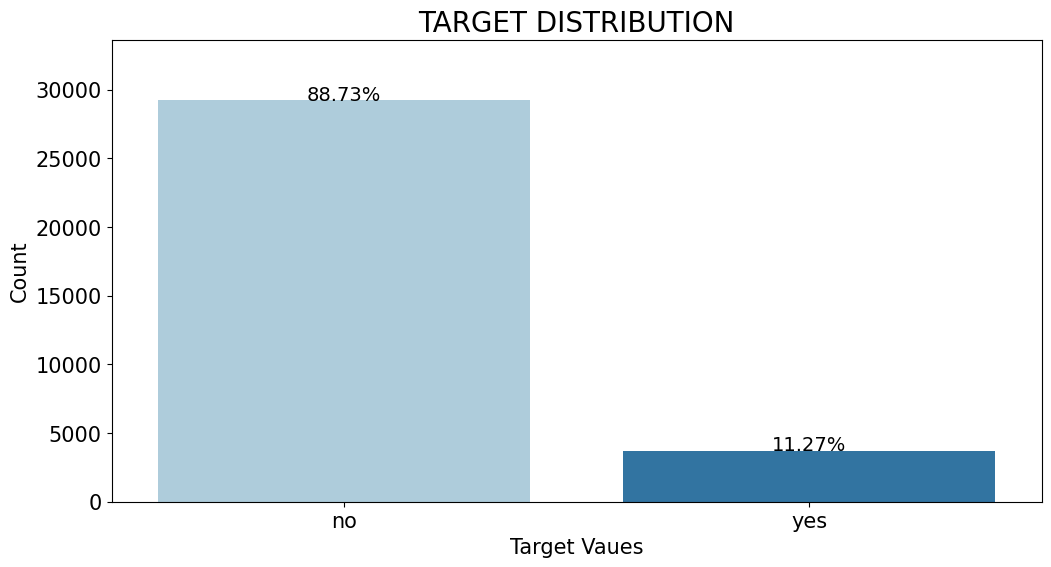

In [ ]:
total = len(train)
plt.figure(figsize=(12,6))

g = sns.countplot(x='y', data=train, palette='Paired')
g.set_title("TARGET DISTRIBUTION", fontsize = 20)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()

In [ ]:
import matplotlib.gridspec as gridspec # to do the grid of plots

def ploting_cat_fet(df, cols, vis_row=5, vis_col=2):

    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(30, 12)) # size of figure
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    plt.rc('xtick', labelsize=8)

    # loop to get column and the count of plots
    for n, col in enumerate(train[cols]):
        tmp = pd.crosstab(train[col], train['y'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'no',1:'yes'}, inplace=True)

        #Plotting a count plot of target value distribution on the x-axis
        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=train, order=list(tmp[col].values) , color='skyblue')
        ax.set_ylabel('Count', fontsize=10) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=10) # title label
        ax.set_xlabel(f'{col} values', fontsize=10) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['yes'].min()-5,tmp['yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=10)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=6)
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

    plt.show()

In [ ]:
cat_cols = ['job', 'education'] # Categoricla
nom_cols = ['marital', 'default','housing','loan','campaign', 'poutcome'] # Nominal
day_cols = ['month','day_of_week'] # Date or Datetime

In [ ]:
eur_bins = [0, 1, 2, 3, 4, 5]
labels = [f"{int(b)}" for b in eur_bins[:-1]]
train['eur_grouped_col'] = pd.cut(train['euribor3m'], bins=eur_bins, labels=labels, right=False)

age_bins = [0, 10, 20, 30, 40, 50, 60, 80, 90, 100]
labels = [f"{int(b)}" for b in age_bins[:-1]]
train['age_grouped_col'] = pd.cut(train['age'], bins=age_bins, labels=labels, right=False)


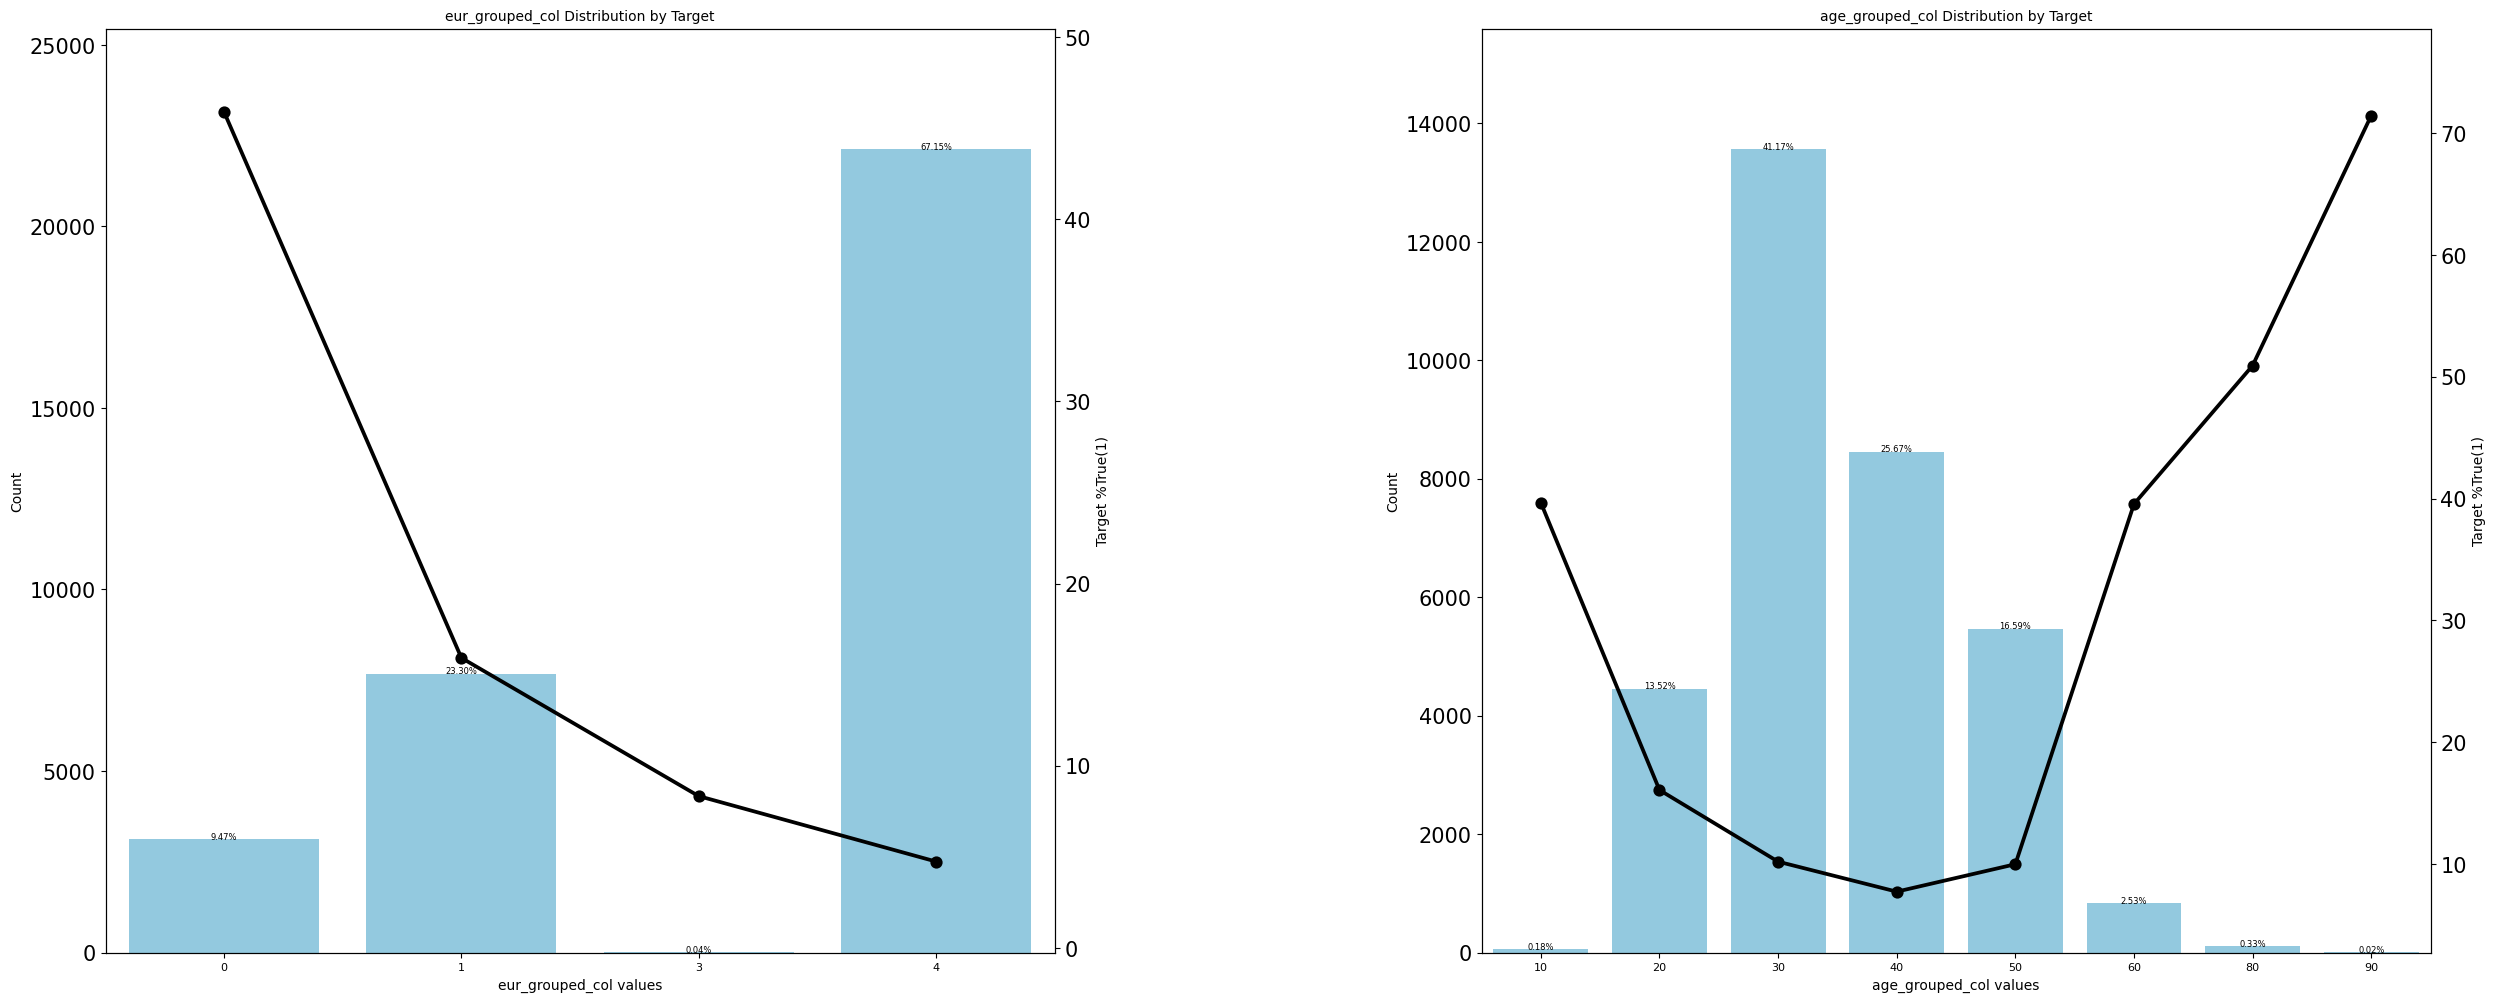

In [ ]:
col_ = ['eur_grouped_col','age_grouped_col']
ploting_cat_fet(train, col_, vis_row=1, vis_col=2)

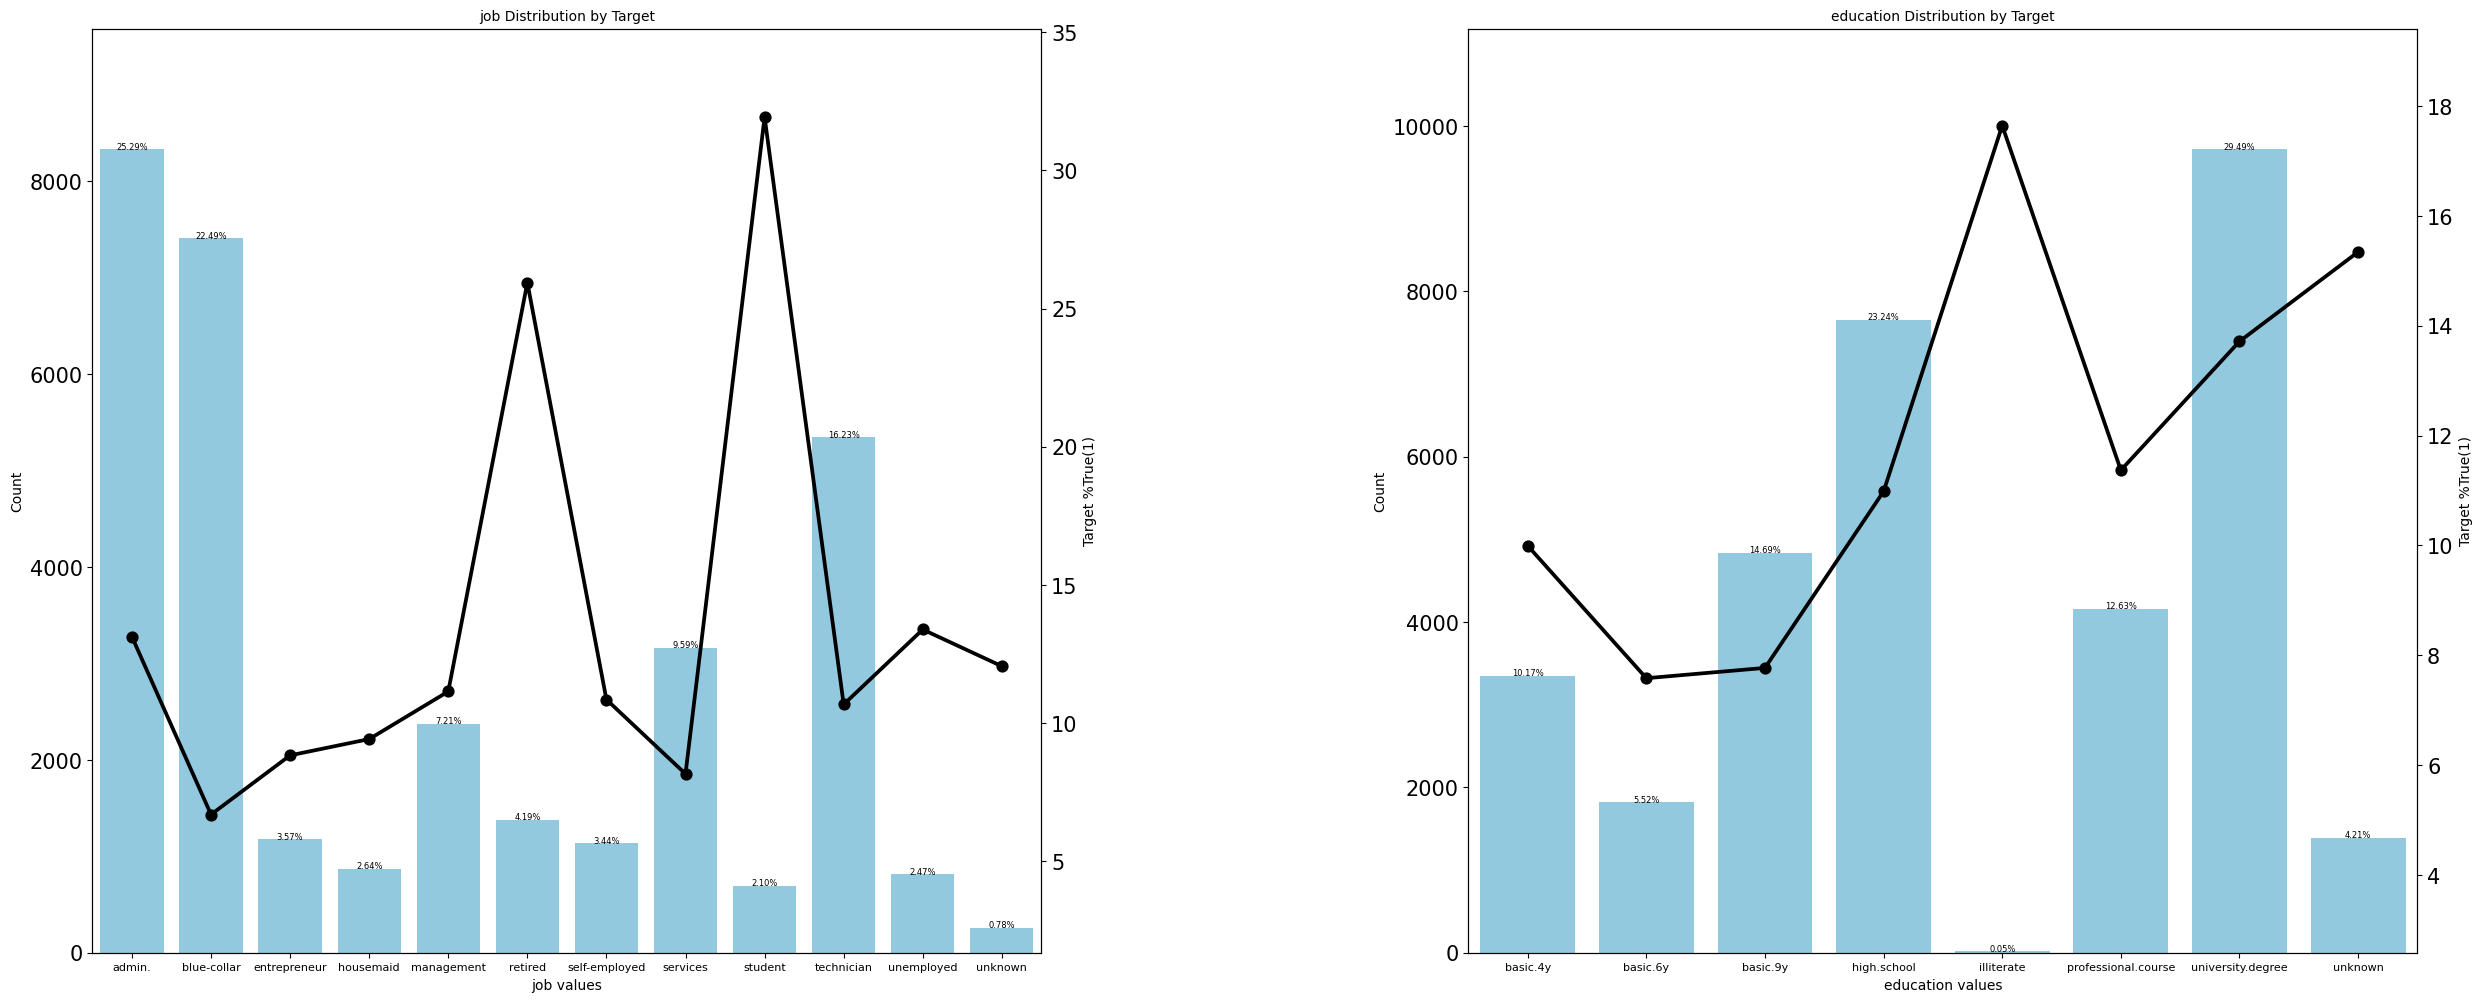

In [ ]:
ploting_cat_fet(train, cat_cols, vis_row=1, vis_col=2)

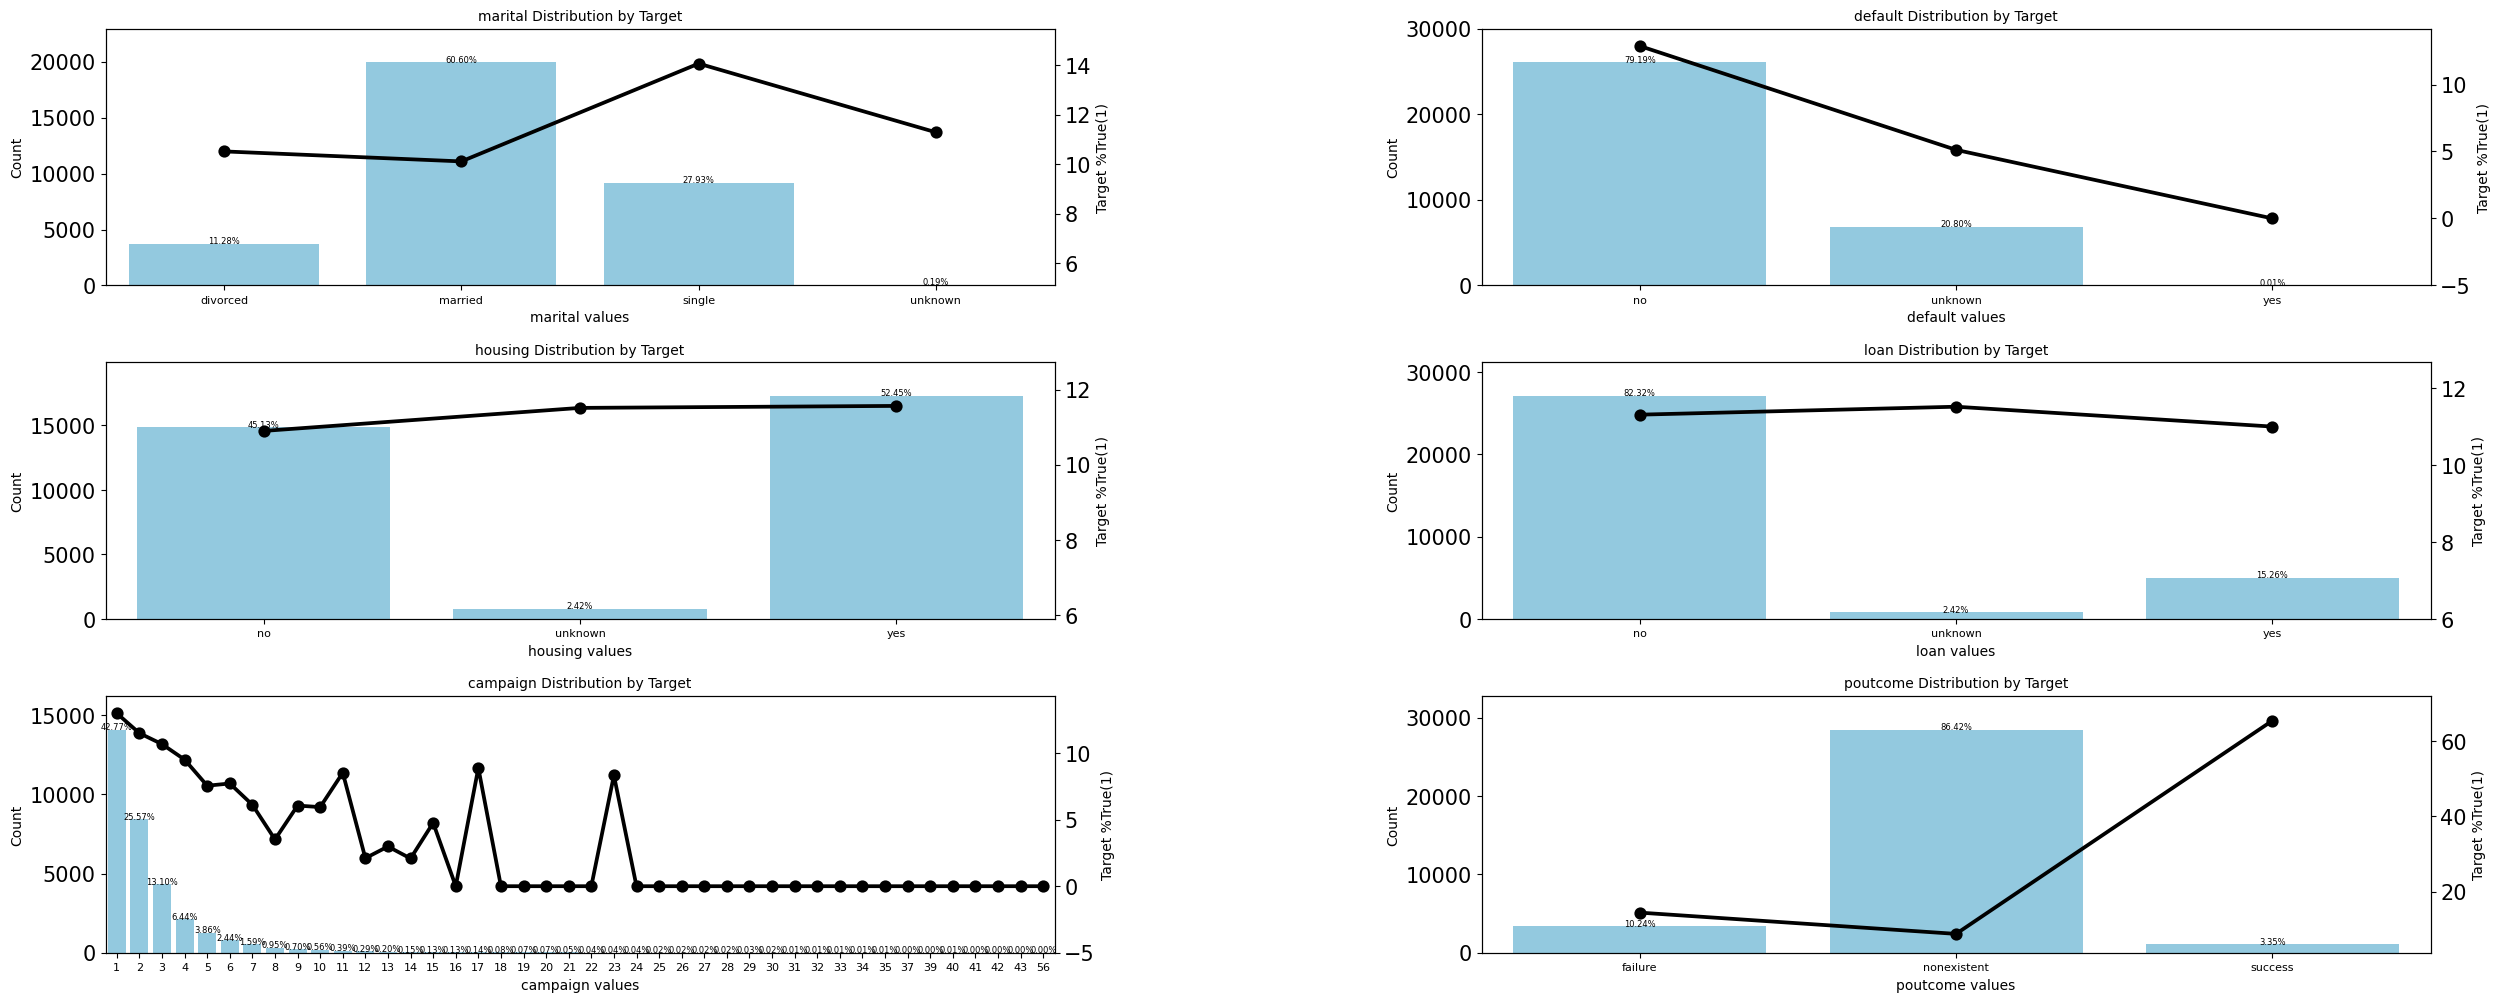

In [ ]:
ploting_cat_fet(train, nom_cols, vis_row=3, vis_col=2)

In [ ]:
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
train['month'] = pd.Categorical(train['month'], categories=month_order, ordered=True)

day_order = ['mon','tue','wed','thu','fri']
train['day_of_week'] = pd.Categorical(train['day_of_week'], categories=day_order, ordered=True)

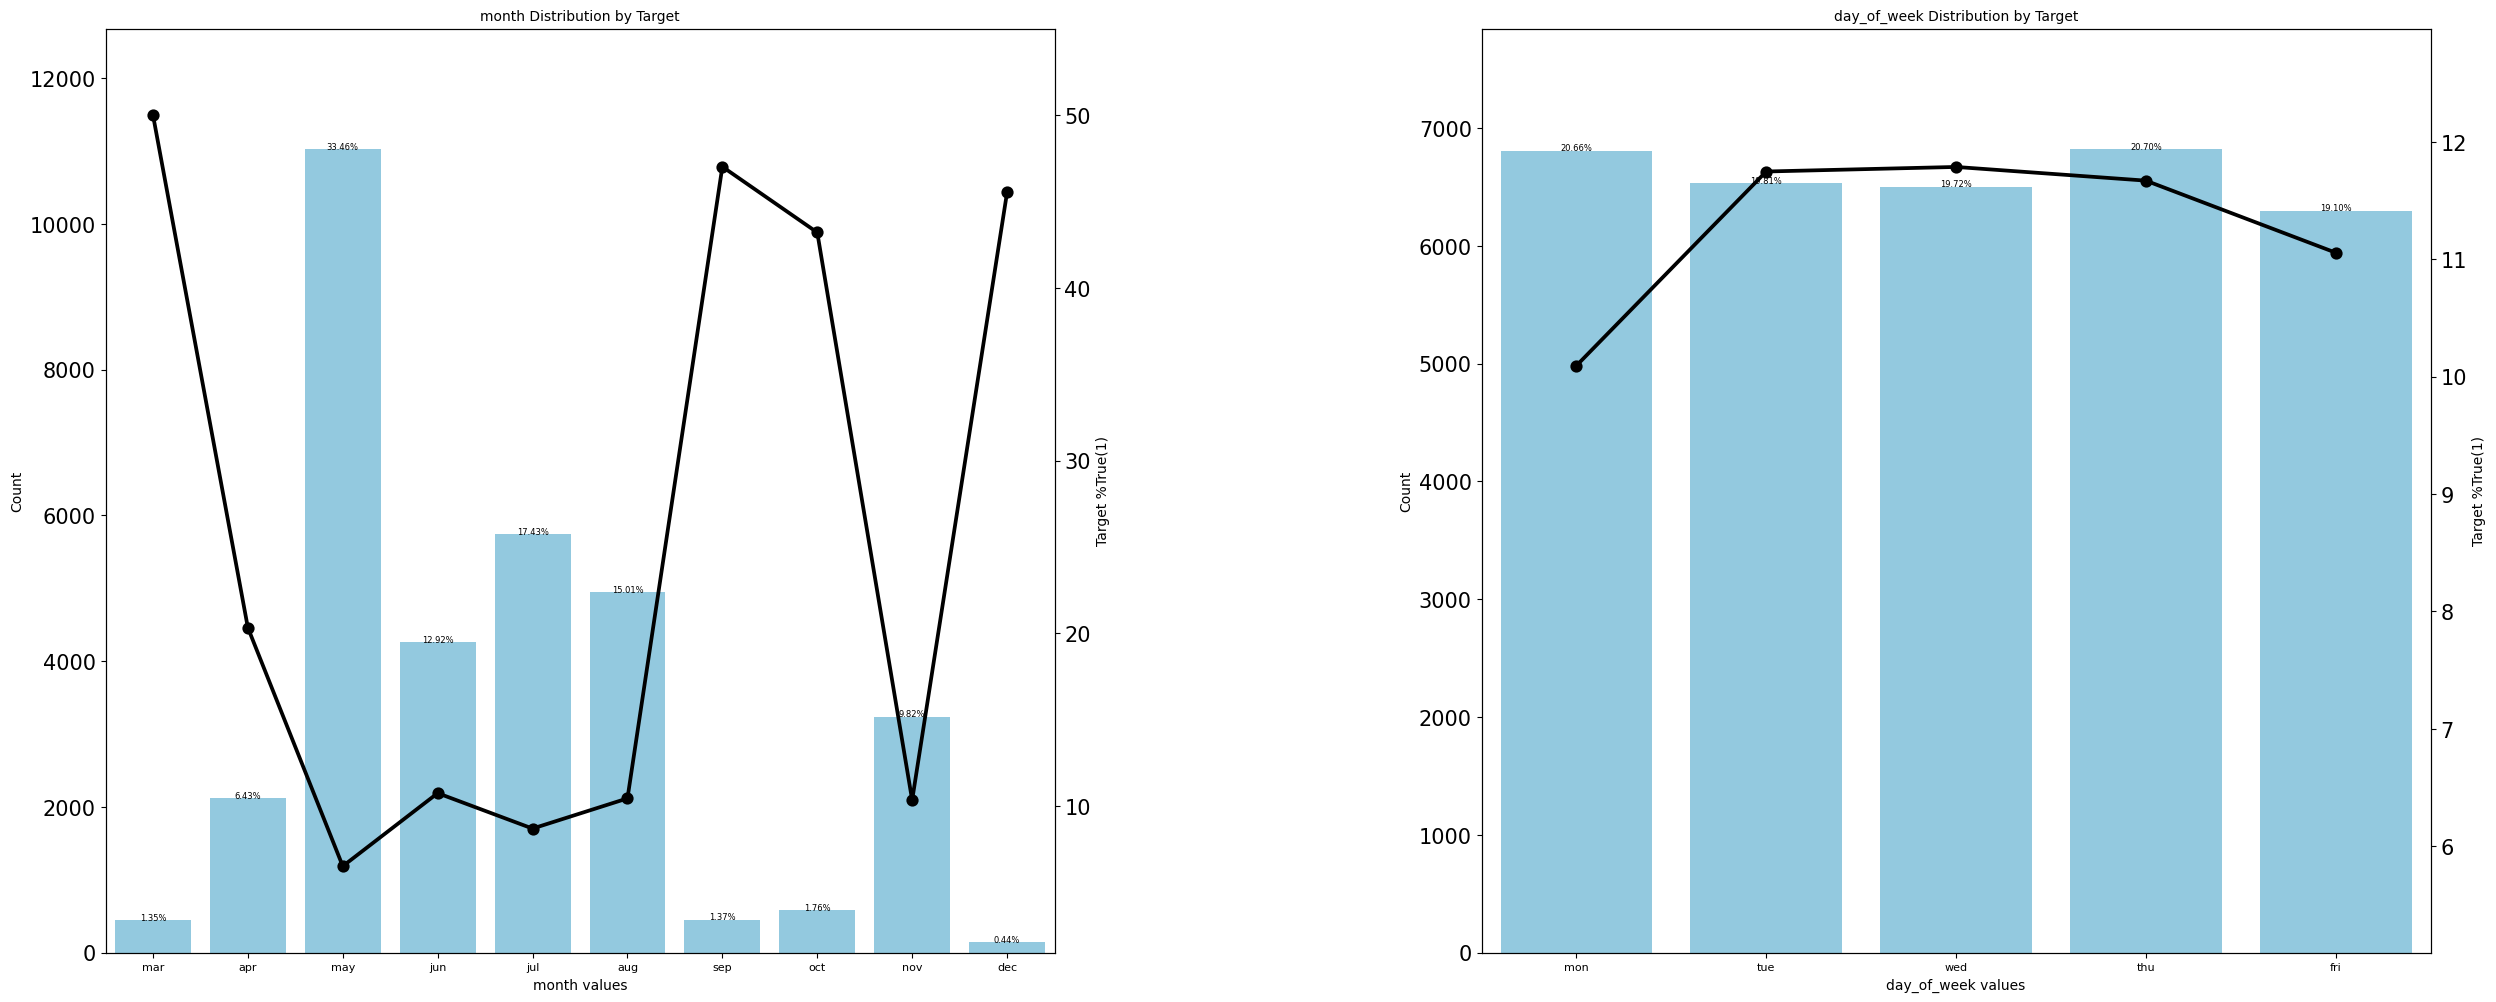

In [ ]:
ploting_cat_fet(train, day_cols, vis_row=1, vis_col=2)

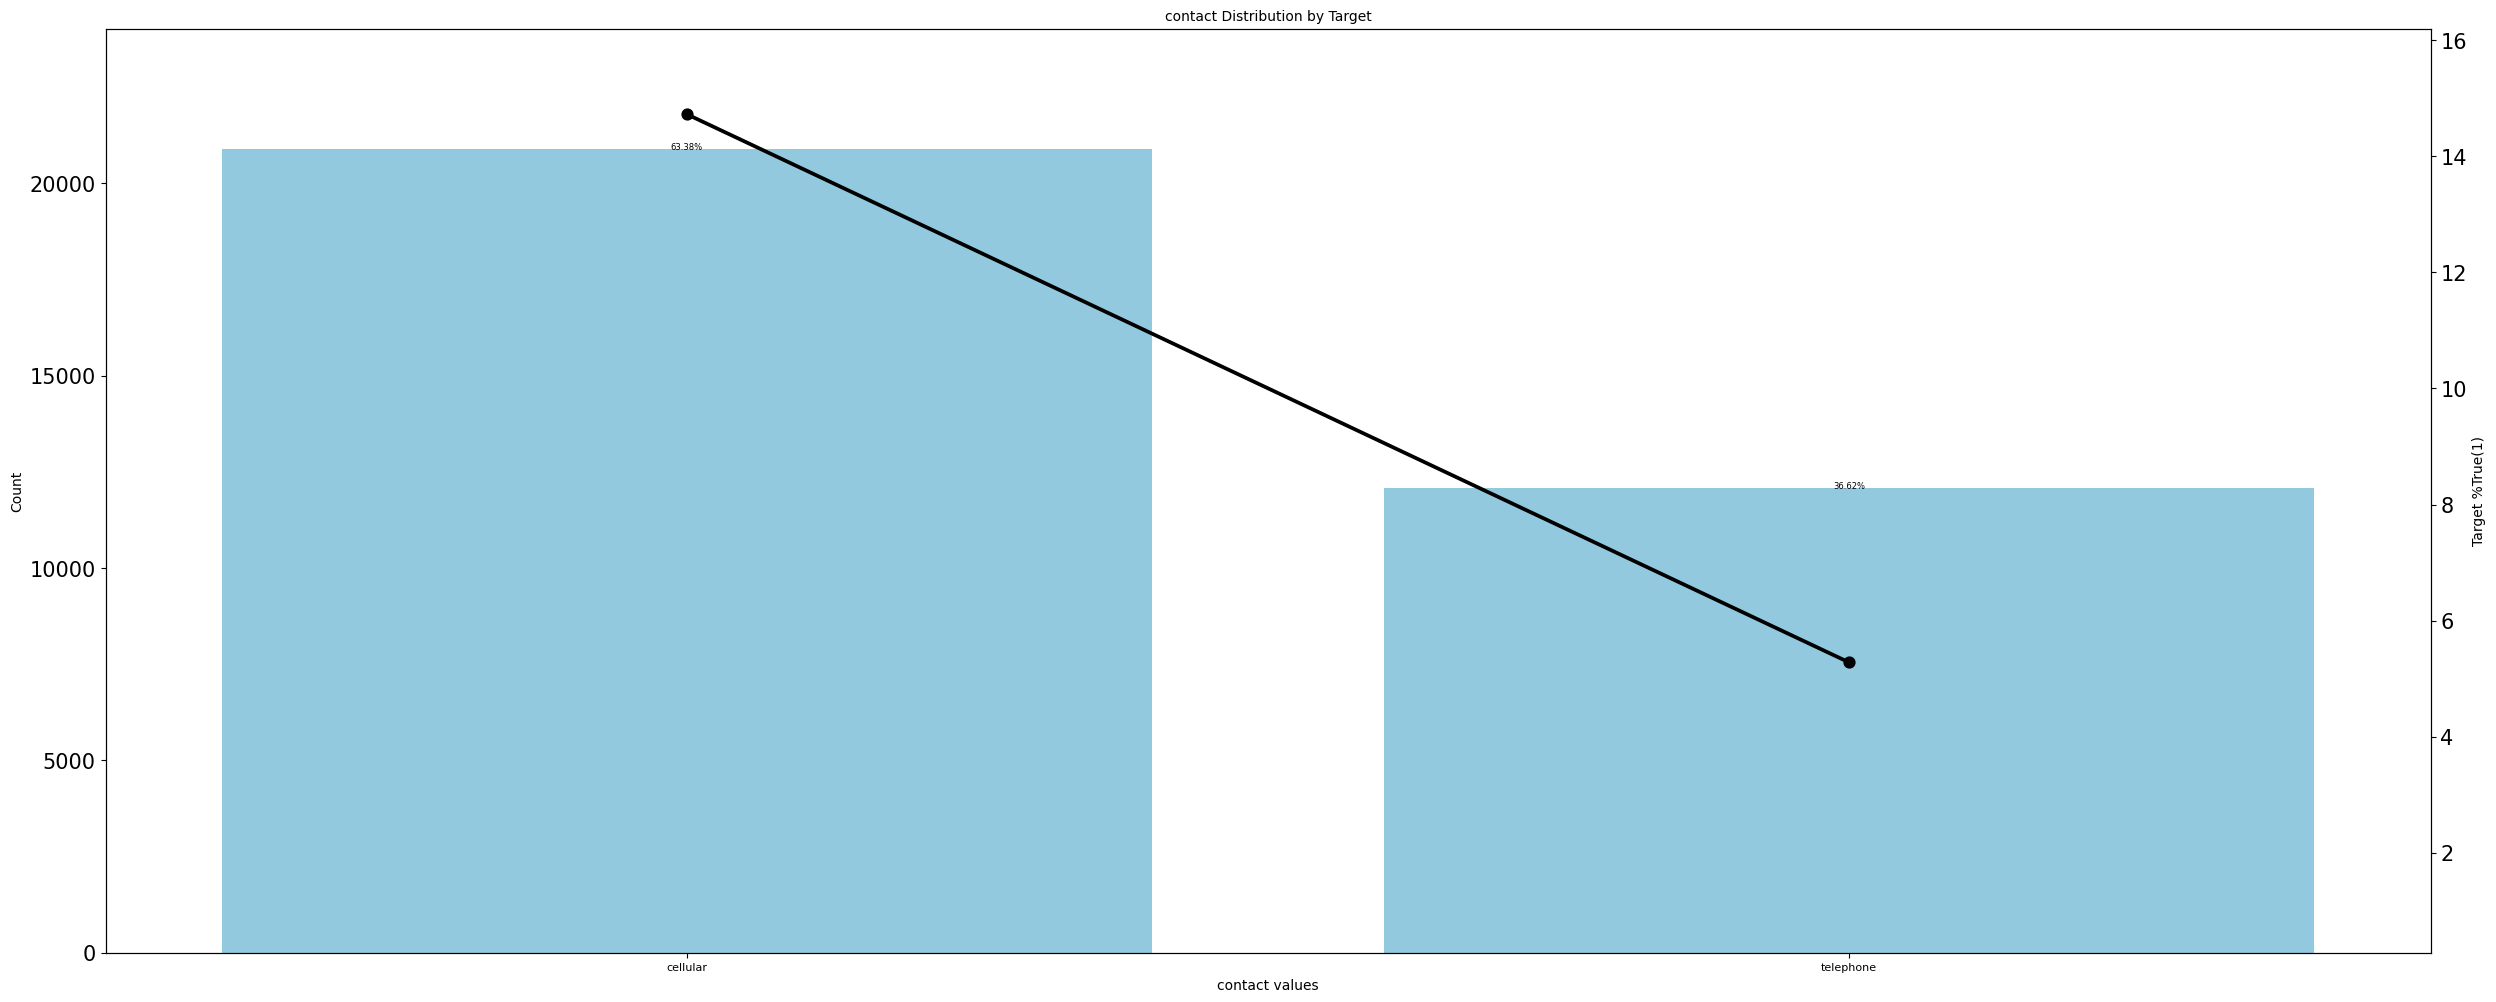

In [ ]:
colss=['contact']
ploting_cat_fet(train, colss, vis_row=1, vis_col=1)

Scatter plot with regression line

<Axes: xlabel='nr.employed', ylabel='euribor3m'>

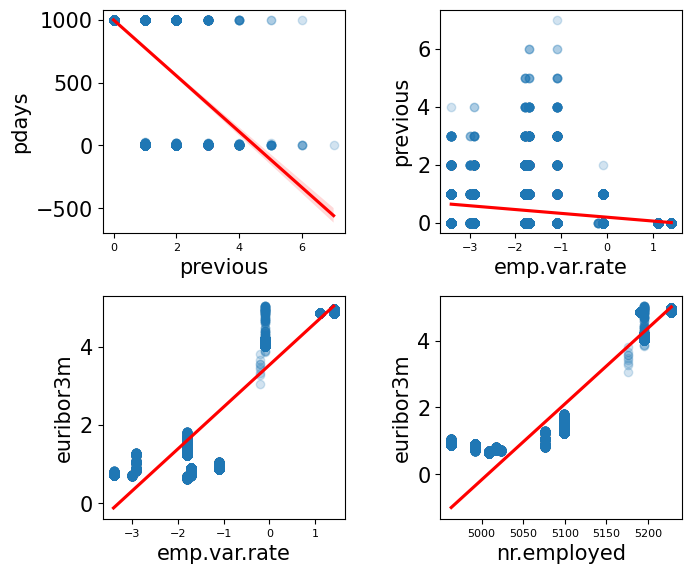

In [ ]:
mpl.rc('font',size=15)
figure, axes = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='previous',y='pdays',data=train,ax=axes[0,0],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
sns.regplot(x='emp.var.rate',y='previous',data=train,ax=axes[0,1],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
sns.regplot(x='emp.var.rate',y='euribor3m',data=train,ax=axes[1,0],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
sns.regplot(x='nr.employed',y='euribor3m',data=train,ax=axes[1,1],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})


Correlation between numerical data



In [ ]:
train_df = train
train_df['y'] = train['y'].map({'yes': 1, 'no': 0})

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

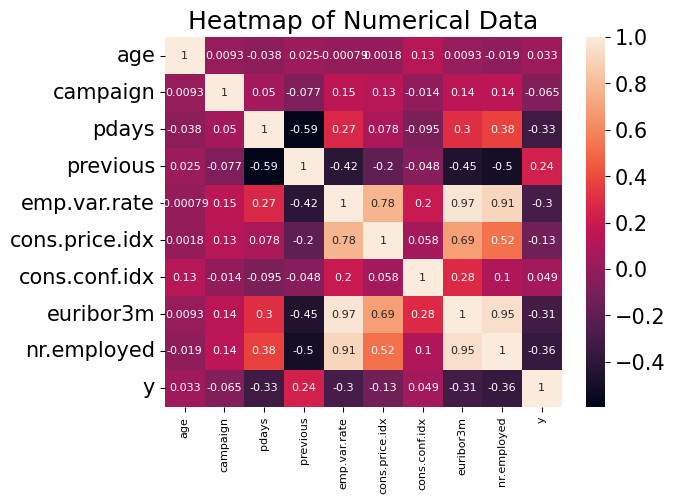

In [ ]:
corrMat = train_df[['age', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']].corr()
fig, ax = plt.subplots()
sns.heatmap(corrMat, annot=True, annot_kws={"size": 8})
ax.set(title='Heatmap of Numerical Data')

#Data Preprocessing

In [ ]:
# Loading the train data
train = pd.read_csv('/content/drive/MyDrive/Pattern Recognition_lab/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Pattern Recognition_lab/test.csv')
test_c = test.copy()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def get_clf_eval(y_val, y_pred=None):
    y_val.reset_index(drop=True)
    confusion = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    F1 = f1_score(y_val, y_pred)

    print("confusion matrix:\n", confusion)
    print("\naccuracy : {:.4f}".format(accuracy))
    print("precision: {:.4f}".format(precision))
    print("recall: {:.4f}".format(recall))
    print("F1 score: {:.4f}".format(F1))

In [ ]:
from sklearn.model_selection import train_test_split

y = train["y"]
drop_features=['id','job','marital','default','housing',
               'loan','contact','month','pdays','previous',
               'poutcome','emp.var.rate','cons.price.idx',
               'euribor3m','nr.employed']
train.drop("y",axis=1, inplace=True)
train=train.drop(columns=drop_features)
test=test.drop(columns=drop_features)

y.replace('no', 0, inplace=True)
y.replace('yes', 1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(
    train, y,
    stratify = y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

##pd.get_dummies

In [ ]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#SmoteENN


In [ ]:
# Balancing imbalanced data
from imblearn.over_sampling import *
from imblearn.combine import *

smoteenn = SMOTEENN(random_state=42)

#x_train
x_train, y_train = smoteenn.fit_resample(x_train, y_train)
train, y = smoteenn.fit_resample(train, y)
print('Training feature/label dataset after applying SMOTEENN:', x_train.shape, y_train.shape)
print('Value distribution after applying SMOTEENN:\n', pd.Series(y_train).value_counts())
#train
print('Training feature/label dataset after applying SMOTEENN:', train.shape, y.shape)
print('Value distribution after applying SMOTEENN:\n', pd.Series(y).value_counts())


Training feature/label dataset after applying SMOTEENN: (34582, 16) (34582,)
Value distribution after applying SMOTEENN:
 y
1    18377
0    16205
Name: count, dtype: int64
Training feature/label dataset after applying SMOTEENN: (42926, 16) (42926,)
Value distribution after applying SMOTEENN:
 y
1    22343
0    20583
Name: count, dtype: int64


#StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

S_scaler = StandardScaler()
x_train = S_scaler.fit_transform(x_train)
x_test = S_scaler.transform(x_test)
train = S_scaler.transform(train)
test = S_scaler.transform(test)

#Stratified K-Fold + lightgbm

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import lightgbm as lgbm
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store model performance
accuracies = []
f1_scores = []

# Stratified K-Fold performing cross validation
for fold, (train_index, val_index) in enumerate(skf.split(x_train, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

# Train/Validation data split
    x_train_fold, x_test_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Generate LightGBM dataset
    train_data = lgbm.Dataset(x_train_fold, label=y_train_fold)
    valid_data = lgbm.Dataset(x_test_fold, label=y_test_fold, reference=train_data)


    # Setting parameters
    params = {
        'boosting_type' : 'gbdt',
        'class_weight' : None,
        'colsample_bytree' : 1.0,
        'importance_type' : 'split',
        'learning_rate' : 0.1,
        'max_depth' : -1,
        'min_child_samples' : 15,
        'min_child_weight' : 0.001,
        'min_split_gain' : 0.0,
        'n_estimators' : 78,
        'n_jobs' : -1,
        'num_leaves' : 39,
        'objective' : None,
        'random_state' : 167,
        'reg_alpha' : 0.0,
        'reg_lambda' : 0.0,
        'subsample' : 1.0,
        'subsample_for_bin' : 200000,
        'subsample_freq' : 0
    }

    # Model Training
    lgbm_model = lgbm.train(
        params,
        train_data,
        valid_sets=[valid_data],
        num_boost_round=100,
    )

    # Prediction / Evaluation
    y_pred = lgbm_model.predict(x_test_fold, num_iteration=lgbm_model.best_iteration)
    y_pred_binary = [1 if pred > 0.6 else 0 for pred in y_pred]

    # Accuracy
    accuracy = accuracy_score(y_test_fold, y_pred_binary)
    accuracies.append(accuracy)

    # F1 score
    f1 = f1_score(y_test_fold, y_pred_binary)
    f1_scores.append(f1)

# Making predictions on the test data using the final model
y_pred_lgbm = lgbm_model.predict(x_test, num_iteration=lgbm_model.best_iteration)
y_pred_lgbm_binary = [1 if pred > 0.6 else 0 for pred in y_pred_lgbm]

# Evaluation
test_accuracy = accuracy_score(y_test, y_pred_lgbm_binary)
test_f1 = f1_score(y_test, y_pred_lgbm_binary)

print(f"\nTest Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")

Fold 1/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 27665, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.531393


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 2/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 27665, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.531393


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 3/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 27666, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.531410


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 4/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 27666, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.531410
Fold 5/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 27666, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.531410


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")



Test Accuracy: 0.8796661608497723
Test F1 Score: 0.5214242607121303


In [ ]:
get_clf_eval(y_test, y_pred_lgbm_binary)

confusion matrix:
 [[5365  483]
 [ 310  432]]

accuracy : 0.8797
precision: 0.4721
recall: 0.5822
F1 score: 0.5214


# Test Prediction

##Learning with full train data

###Stratified K-Fold + lightgbm

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import lightgbm as lgbm
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store model performance
accuracies = []
f1_scores = []

# Stratified K-Fold performing cross validation
for fold, (train_index, val_index) in enumerate(skf.split(train, y)):
    print(f"Fold {fold+1}/{n_splits}")

# Train/Validation data split
    x_train_fold, x_test_fold = train[train_index], train[val_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[val_index]

    # Generate LightGBM dataset
    train_data = lgbm.Dataset(x_train_fold, label=y_train_fold)
    valid_data = lgbm.Dataset(x_test_fold, label=y_test_fold, reference=train_data)


    # Setting parameters
    params = {
        'boosting_type' : 'gbdt',
        'class_weight' : None,
        'colsample_bytree' : 1.0,
        'importance_type' : 'split',
        'learning_rate' : 0.1,
        'max_depth' : -1,
        'min_child_samples' : 15,
        'min_child_weight' : 0.001,
        'min_split_gain' : 0.0,
        'n_estimators' : 78,
        'n_jobs' : -1,
        'num_leaves' : 39,
        'objective' : None,
        'random_state' : 167,
        'reg_alpha' : 0.0,
        'reg_lambda' : 0.0,
        'subsample' : 1.0,
        'subsample_for_bin' : 200000,
        'subsample_freq' : 0
    }

    # Model Training
    lgbm_model = lgbm.train(
        params,
        train_data,
        valid_sets=[valid_data],
        num_boost_round=100,
    )

    # Prediction / Evaluation
    y_pred = lgbm_model.predict(x_test_fold, num_iteration=lgbm_model.best_iteration)
    y_pred_binary = [1 if pred > 0.6 else 0 for pred in y_pred]

    # Accuracy
    accuracy = accuracy_score(y_test_fold, y_pred_binary)
    accuracies.append(accuracy)

    # F1 score
    f1 = f1_score(y_test_fold, y_pred_binary)
    f1_scores.append(f1)


Fold 1/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 34340, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.520501


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 2/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 34341, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.520515


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 3/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 34341, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.520515


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 4/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 34341, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.520486


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 5/5
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 34341, number of used features: 16
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Start training from score 0.520486


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [ ]:
predictions = lgbm_model.predict(test, num_iteration=lgbm_model.best_iteration)
pred_binary = (predictions > 0.6).astype(int)

# Save prediction file

In [ ]:
# add 'y_predictions' column on test file
pred = pd.DataFrame(pred_binary, columns = ['y_predict'])
test_c['y_predict'] = pred

# Save the result
test_c.to_csv('/content/drive/MyDrive/Pattern Recognition_lab/prediction.csv', index=False)

In [ ]:
prediction = pd.read_csv('/content/drive/MyDrive/Pattern Recognition_lab/prediction.csv')

prediction.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_predict
0,24188,54,admin.,married,university.degree,no,no,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,8688,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
2,35789,27,unemployed,married,high.school,no,yes,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
3,20034,39,admin.,married,university.degree,no,yes,no,cellular,aug,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
4,11392,43,services,married,high.school,unknown,yes,no,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0


# Analysis of Result

<ipython-input-71-ed1d0bafac43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x='y_predict', data=prediction, palette='Paired')


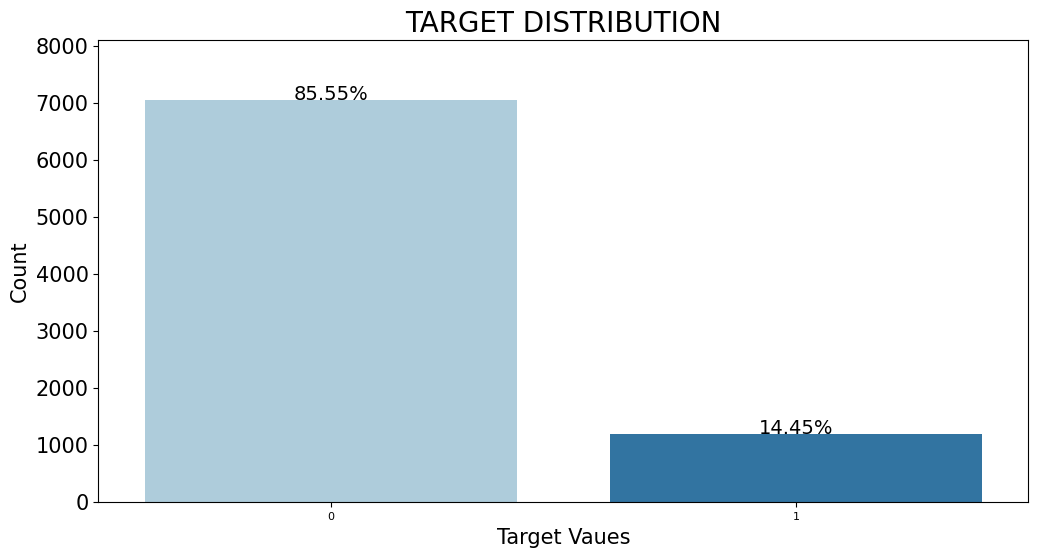

In [ ]:
total = len(prediction)
plt.figure(figsize=(12,6))

g = sns.countplot(x='y_predict', data=prediction, palette='Paired')
g.set_title("TARGET DISTRIBUTION", fontsize = 20)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()

As a result of the prediction, the proportion of people who did not subscribe to term deposits was 85.5%, showing a high percentage of people who did not subscribe.

In [ ]:
import matplotlib.gridspec as gridspec # to do the grid of plots

def ploting_cat_fet(df, cols, vis_row=5, vis_col=2):

    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(30, 12)) # size of figure
    plt.subplots_adjust(wspace=0.45, hspace=0.3)

    # loop to get column and the count of plots
    for n, col in enumerate(prediction[cols]):
        tmp = pd.crosstab(prediction[col], prediction['y_predict'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'no',1:'yes'}, inplace=True)

        # Plotting a count plot of target value distribution on the x-axis
        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=prediction, order=list(tmp[col].values) , color='pink')
        ax.set_ylabel('Count', fontsize=10) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=10) # title label
        ax.set_xlabel(f'{col} values', fontsize=10) # x axis label

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['yes'].min()-5,tmp['yes'].max()*1.1)
        gt.set_ylabel("Target %True(1)", fontsize=10)
        sizes=[] # Get highest values in y
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=6)
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

    plt.show()

In [ ]:
cat_cols = ['job', 'education'] # Categorical
nom_cols = ['marital', 'default','housing','loan','campaign', 'poutcome'] # Nominal
day_cols = ['month','day_of_week'] # Date or Datetime

In [ ]:
eur_bins = [0, 1, 2, 3, 4, 5]
labels = [f"{int(b)}" for b in eur_bins[:-1]]
prediction['eur_grouped_col'] = pd.cut(prediction['euribor3m'], bins=eur_bins, labels=labels, right=False)

age_bins = [0, 10, 20, 30, 40, 50, 60, 80, 90, 100]
labels = [f"{int(b)}" for b in age_bins[:-1]]
prediction['age_grouped_col'] = pd.cut(prediction['age'], bins=age_bins, labels=labels, right=False)

Bar represents **the count of each group**, the above value represents **the group's ratio to the total**, and the black line graph represents **the fixed deposit subscription ratio of each group**

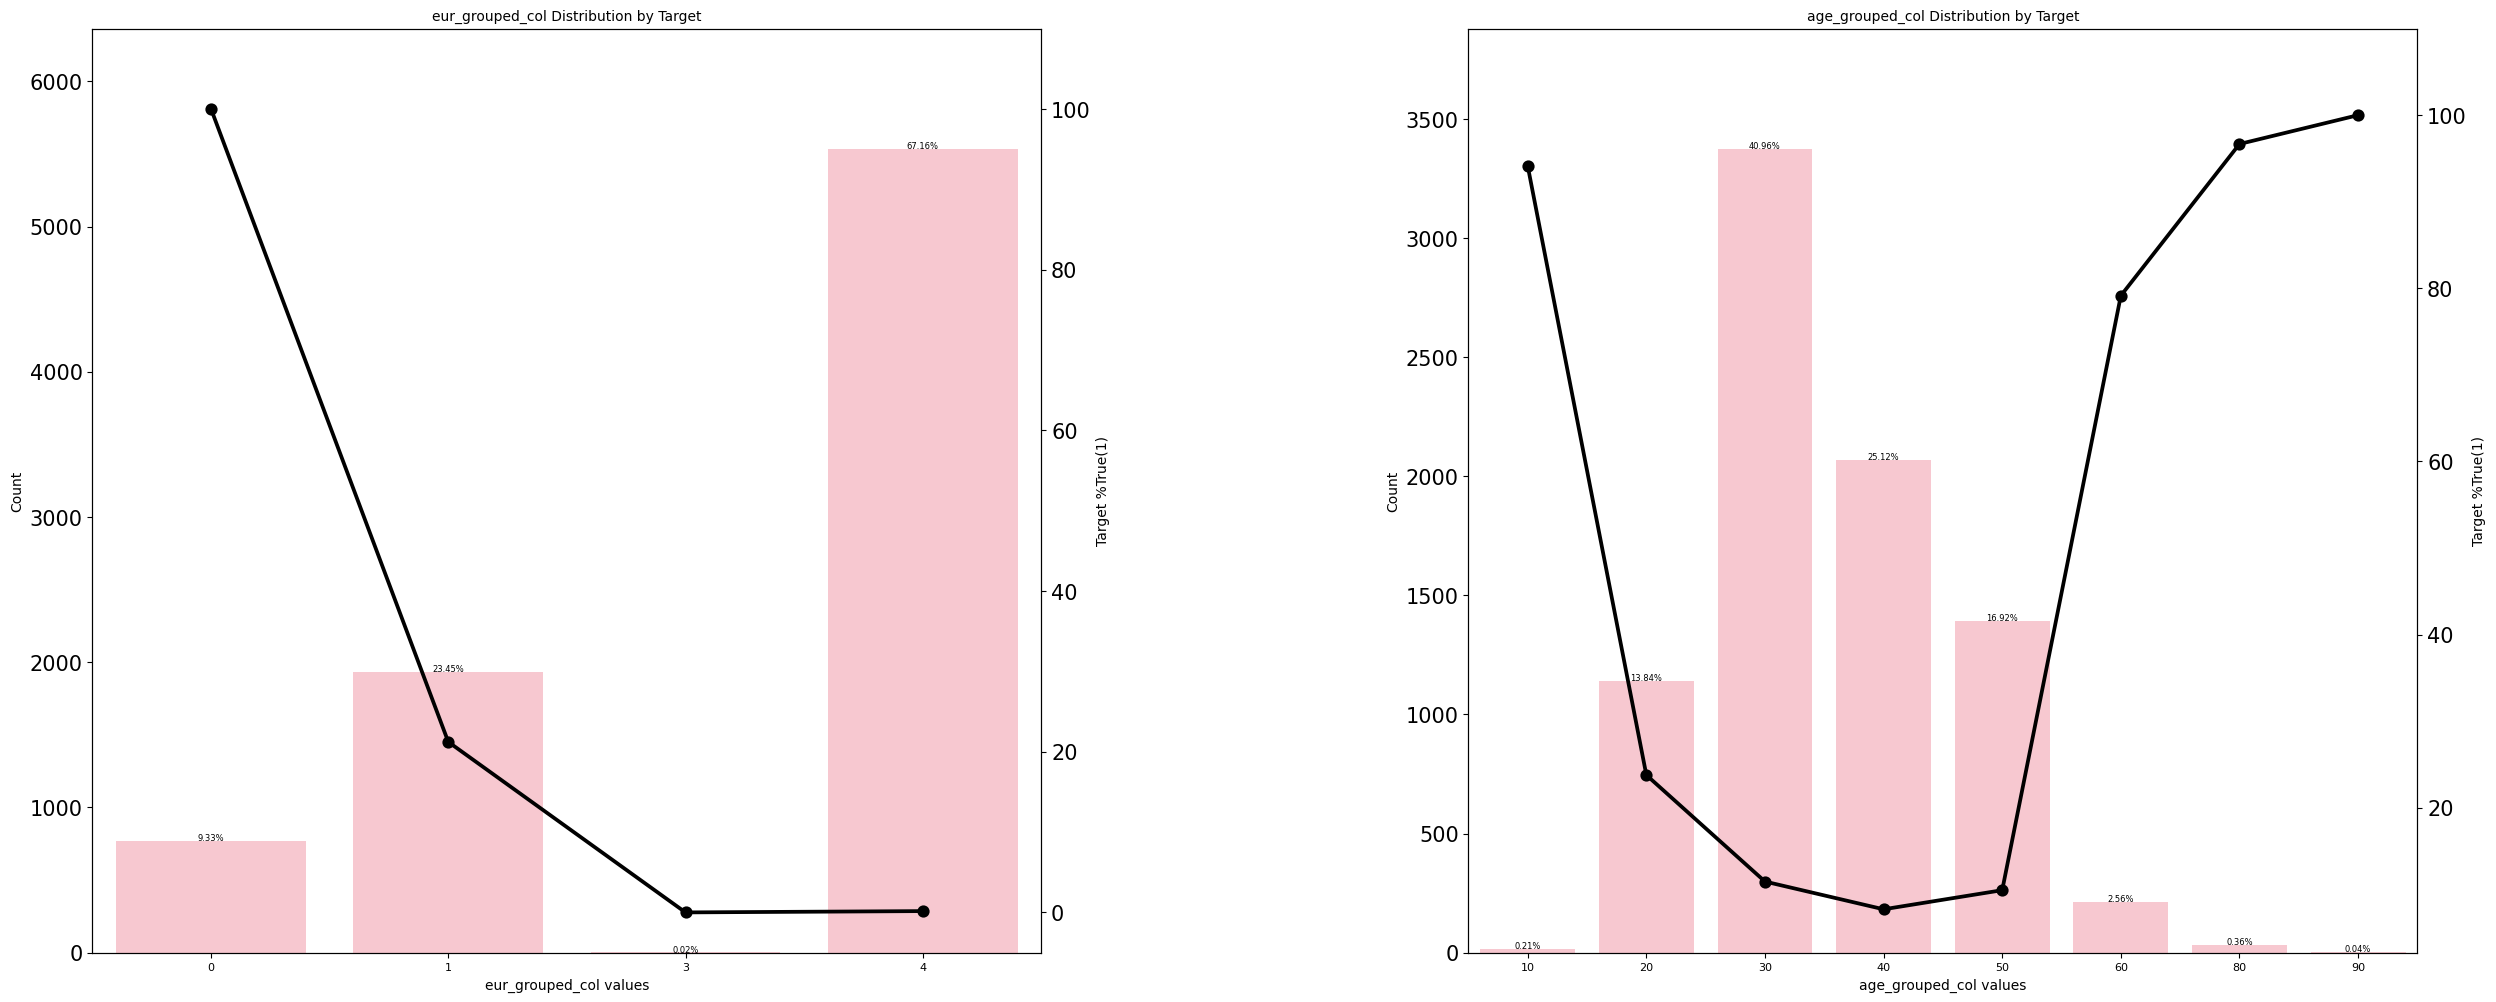

In [ ]:
col_ = ['eur_grouped_col','age_grouped_col']
ploting_cat_fet(prediction, col_, vis_row=1, vis_col=2)

When the euribor3m is divided into 0% to 4%, the subscription rate is the highest when it is in the 0% range, and as the euribor rises, the subscription rate decreases significantly.

In addition, if you look at the age graph next to it, the percentage of customers is in their 30s to 40s, but term deposits are subscribed a lot by customers in their teens or 60s or older.

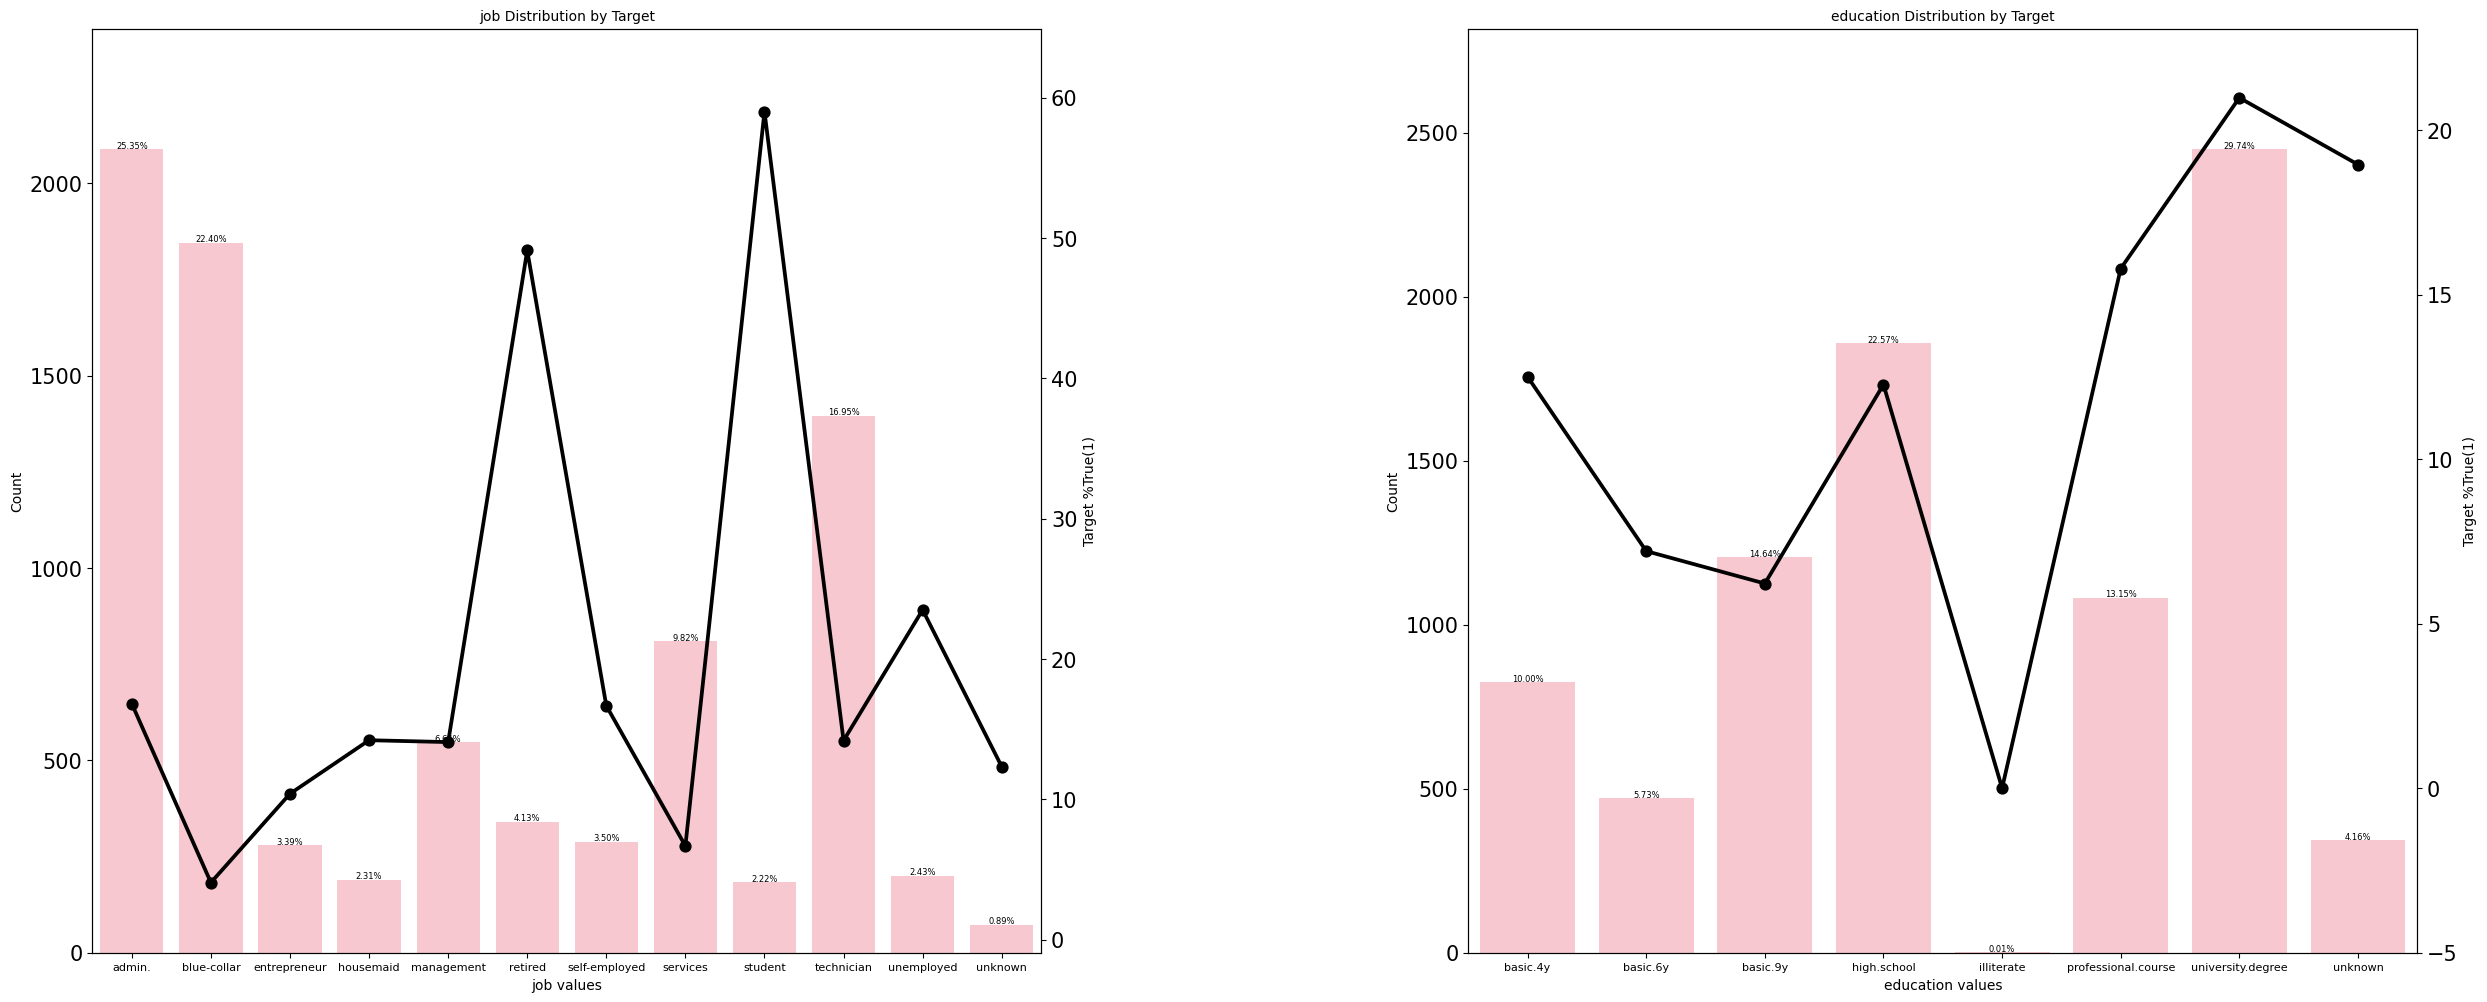

In [ ]:
ploting_cat_fet(prediction, cat_cols, vis_row=1, vis_col=2)

Looking at the job distribution graph, customers have a high percentage of admin., blue-collars, and technicalians, but term deposits are subscribed by more than 50% of retired or student customers.

According to the education distribution, although the subscription rate of customers belonging to university.degree was the highest, it showed a low rate that did not exceed 20% overall.

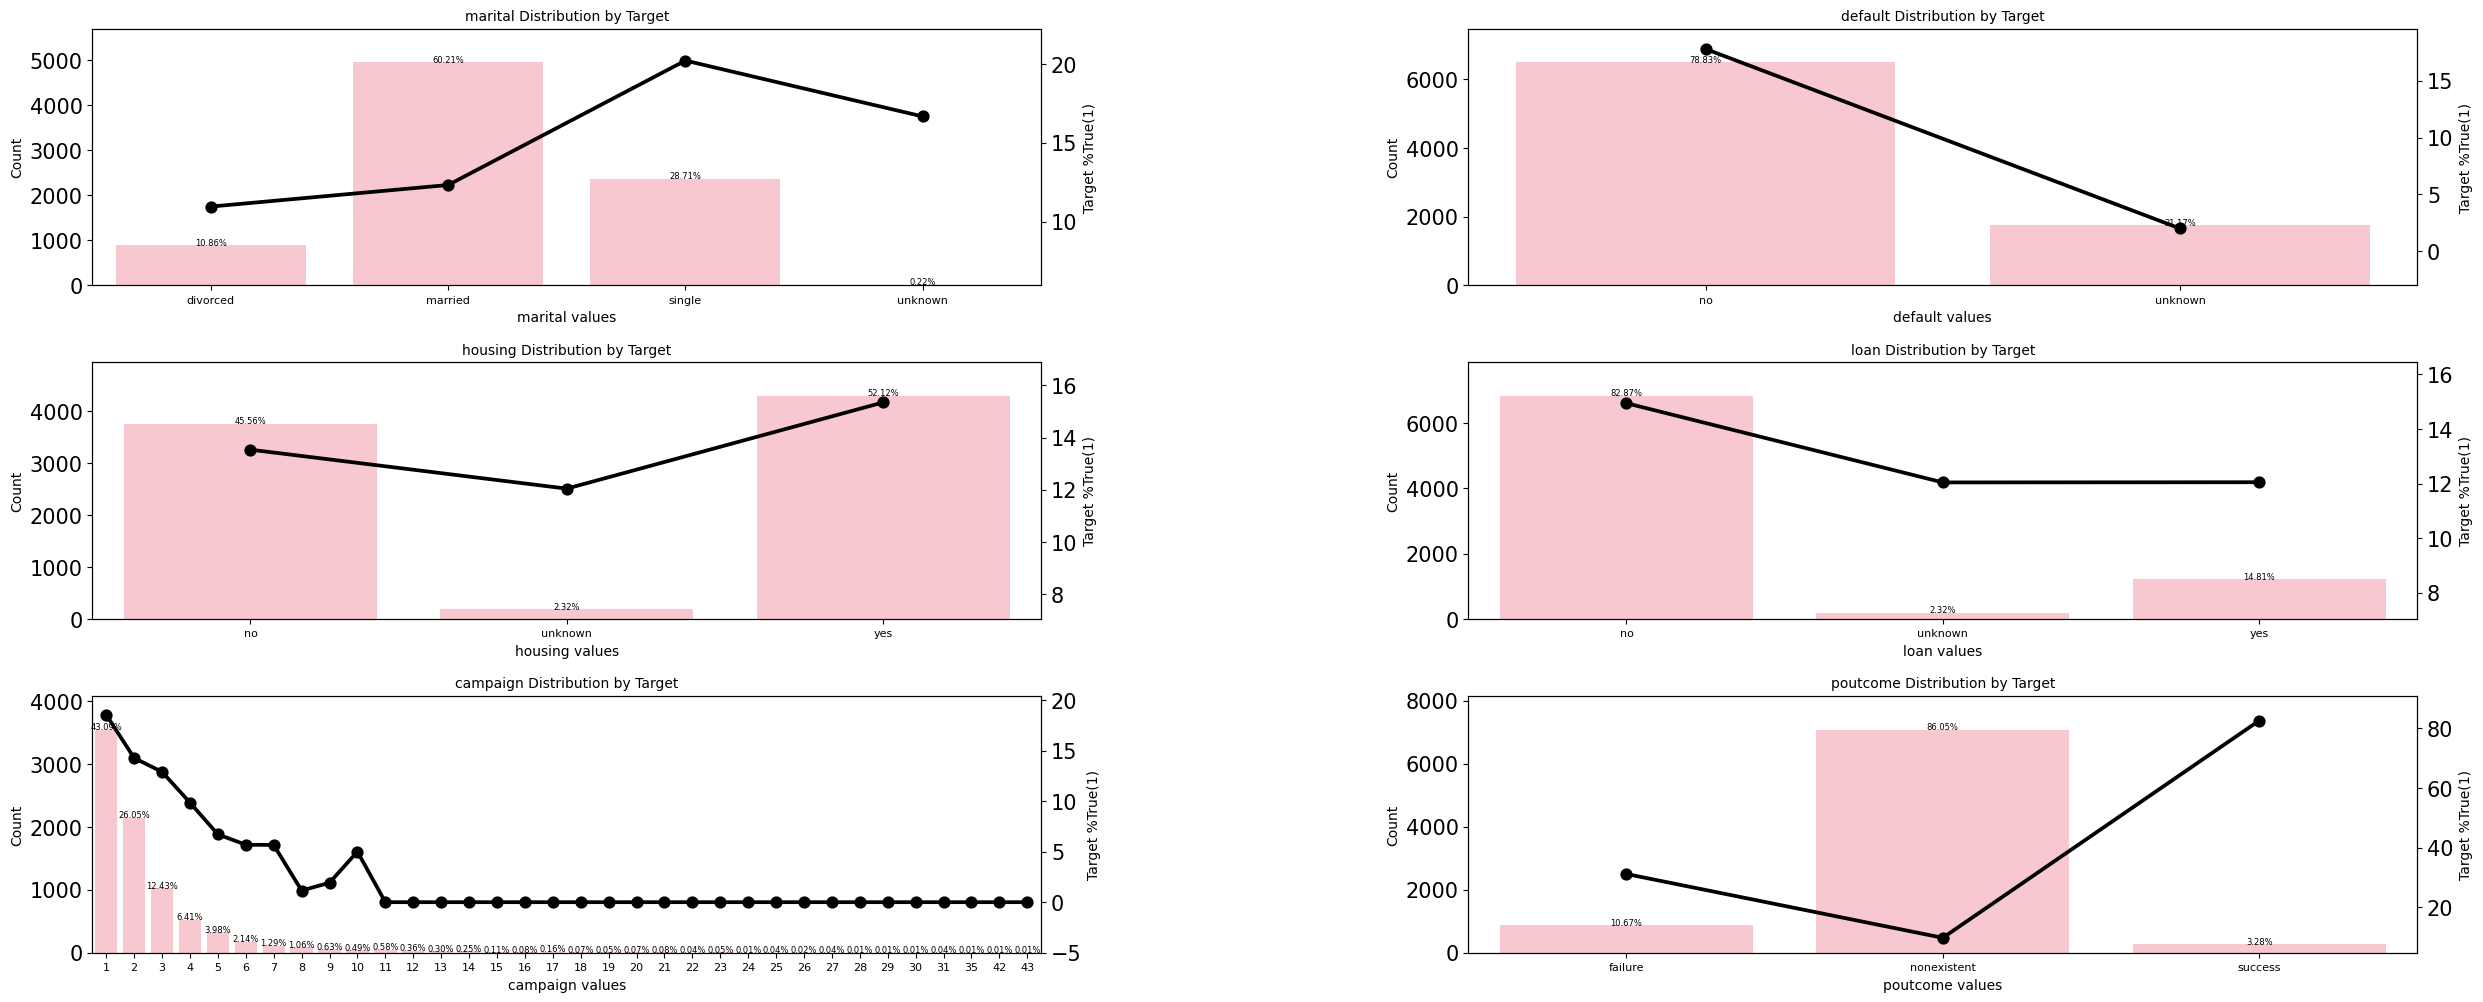

In [ ]:
ploting_cat_fet(prediction, nom_cols, vis_row=3, vis_col=2)

As for the marital distribution, married people accounted for a high percentage of customers at about 60%, and the subscription rate was the highest at about 20% for single.

As for the default distribution, the no ratio is very high at 75%, but the subscription rate is very low.

Looking at the housing distribution, the yes and no ratios were similar, and the term deposit subscription rates of each group were all as low as 16%.

It can be seen that the loan distribution is a small percentage of the no group of about 82%, and the term deposit subscription rate is the highest, but less than 16%.

In the campaign distribution, the smaller the number of contacts during the campaign period, the higher the subscription rate. Through this, if customers do not subscribe to about 7 contacts, the effect of more contacts will be very small.

Looking at the poutcome distribution, if it is fail or nonexistent, the term deposit subscription rate is very low, but you can see a subscription rate of 80% or more just by successfully.

In [ ]:
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
prediction['month'] = pd.Categorical(prediction['month'], categories=month_order, ordered=True)

day_order = ['mon','tue','wed','thu','fri']
prediction['day_of_week'] = pd.Categorical(prediction['day_of_week'], categories=day_order, ordered=True)

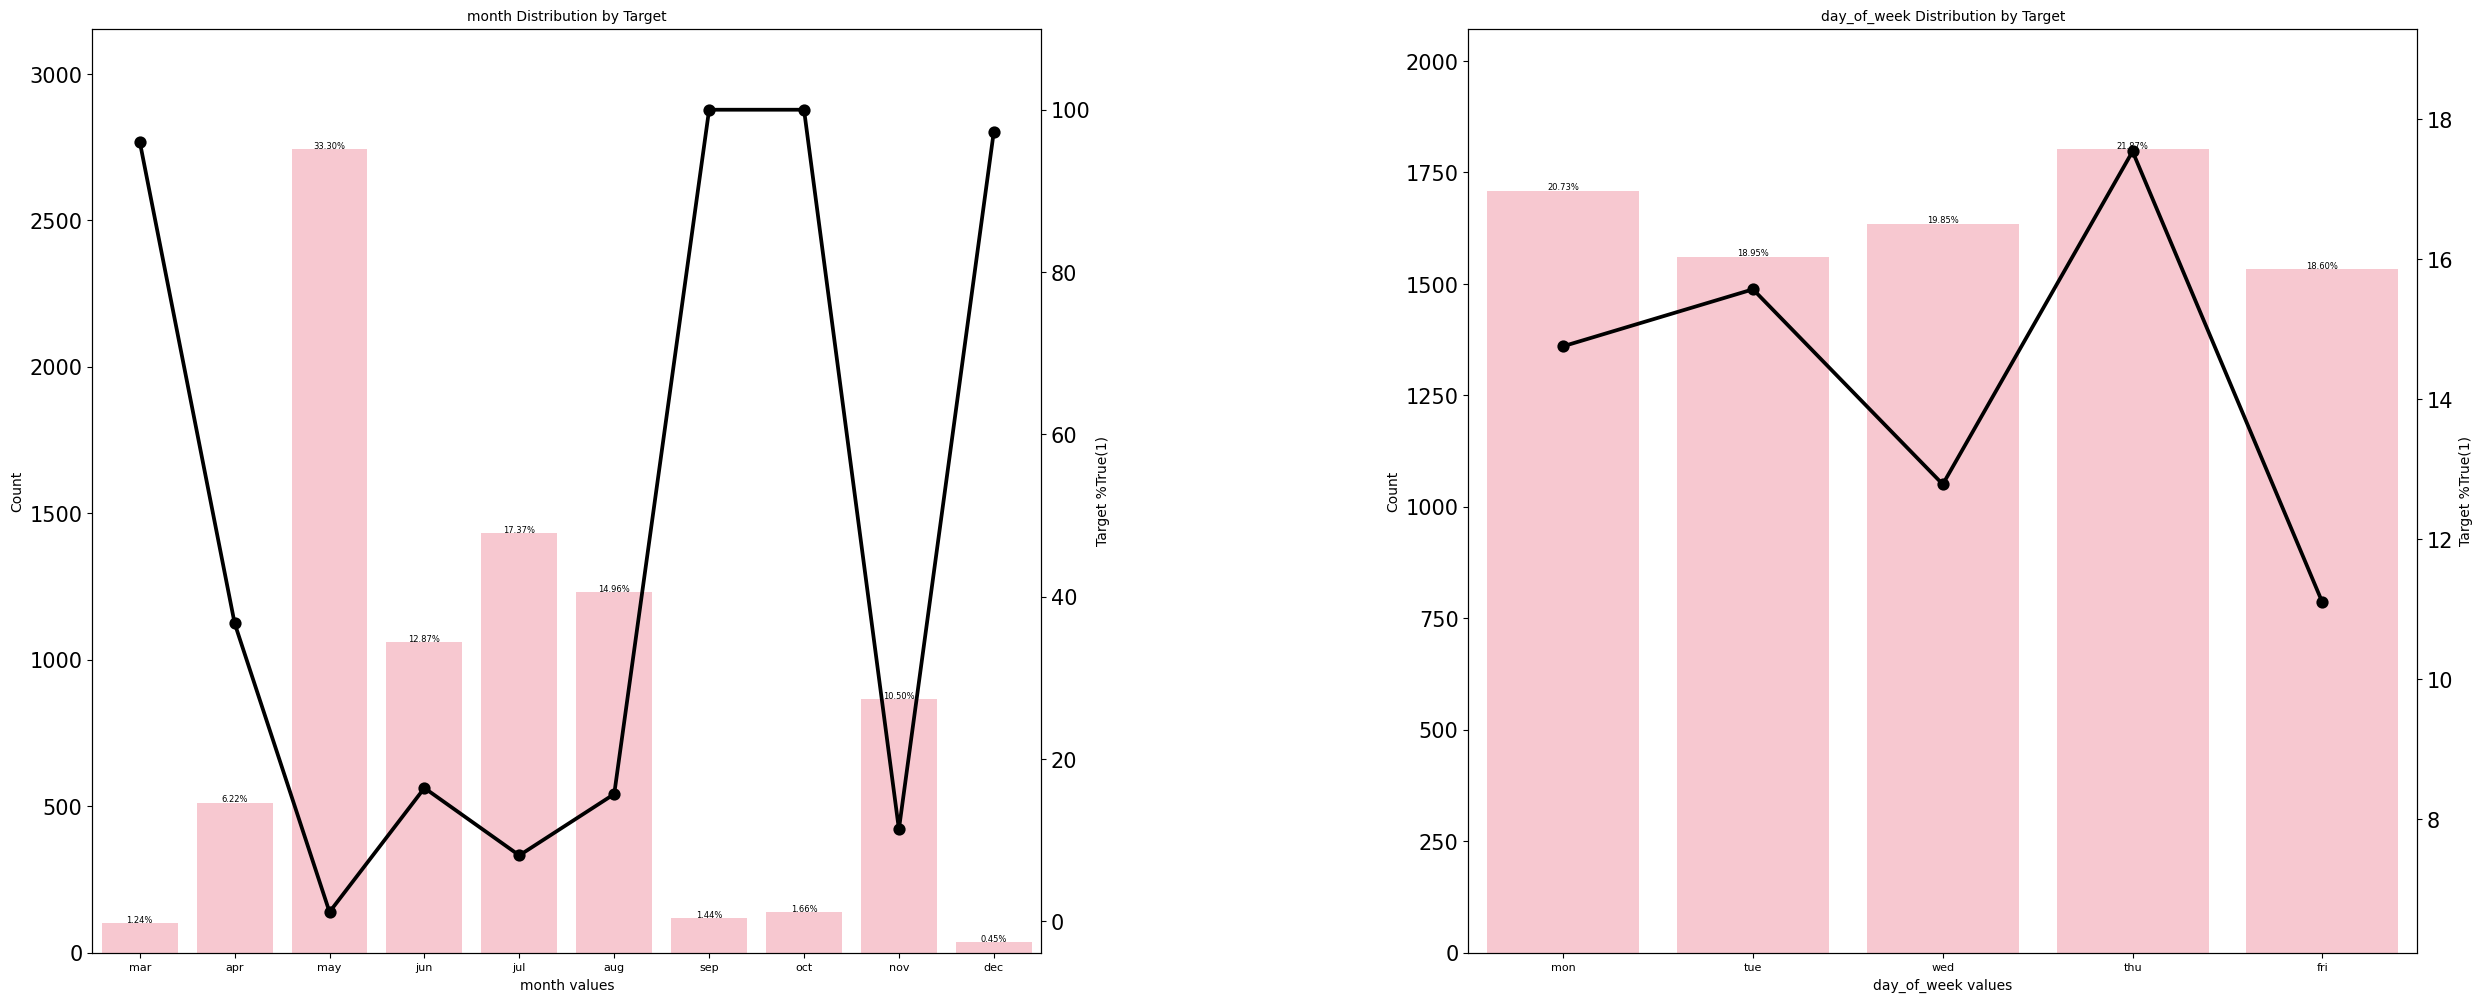

In [ ]:
ploting_cat_fet(prediction, day_cols, vis_row=1, vis_col=2)

Looking at the month distribution, the percentage of customers who made last contact with march, september, operator, and december is low, but the term deposit subscription rate is very high, almost 100%.

In day_of_week distribution, the ratio of each day of the week is similar, and the subscription ratio is the highest on Thursday and the lowest on Friday, but there is no significant difference between the two.

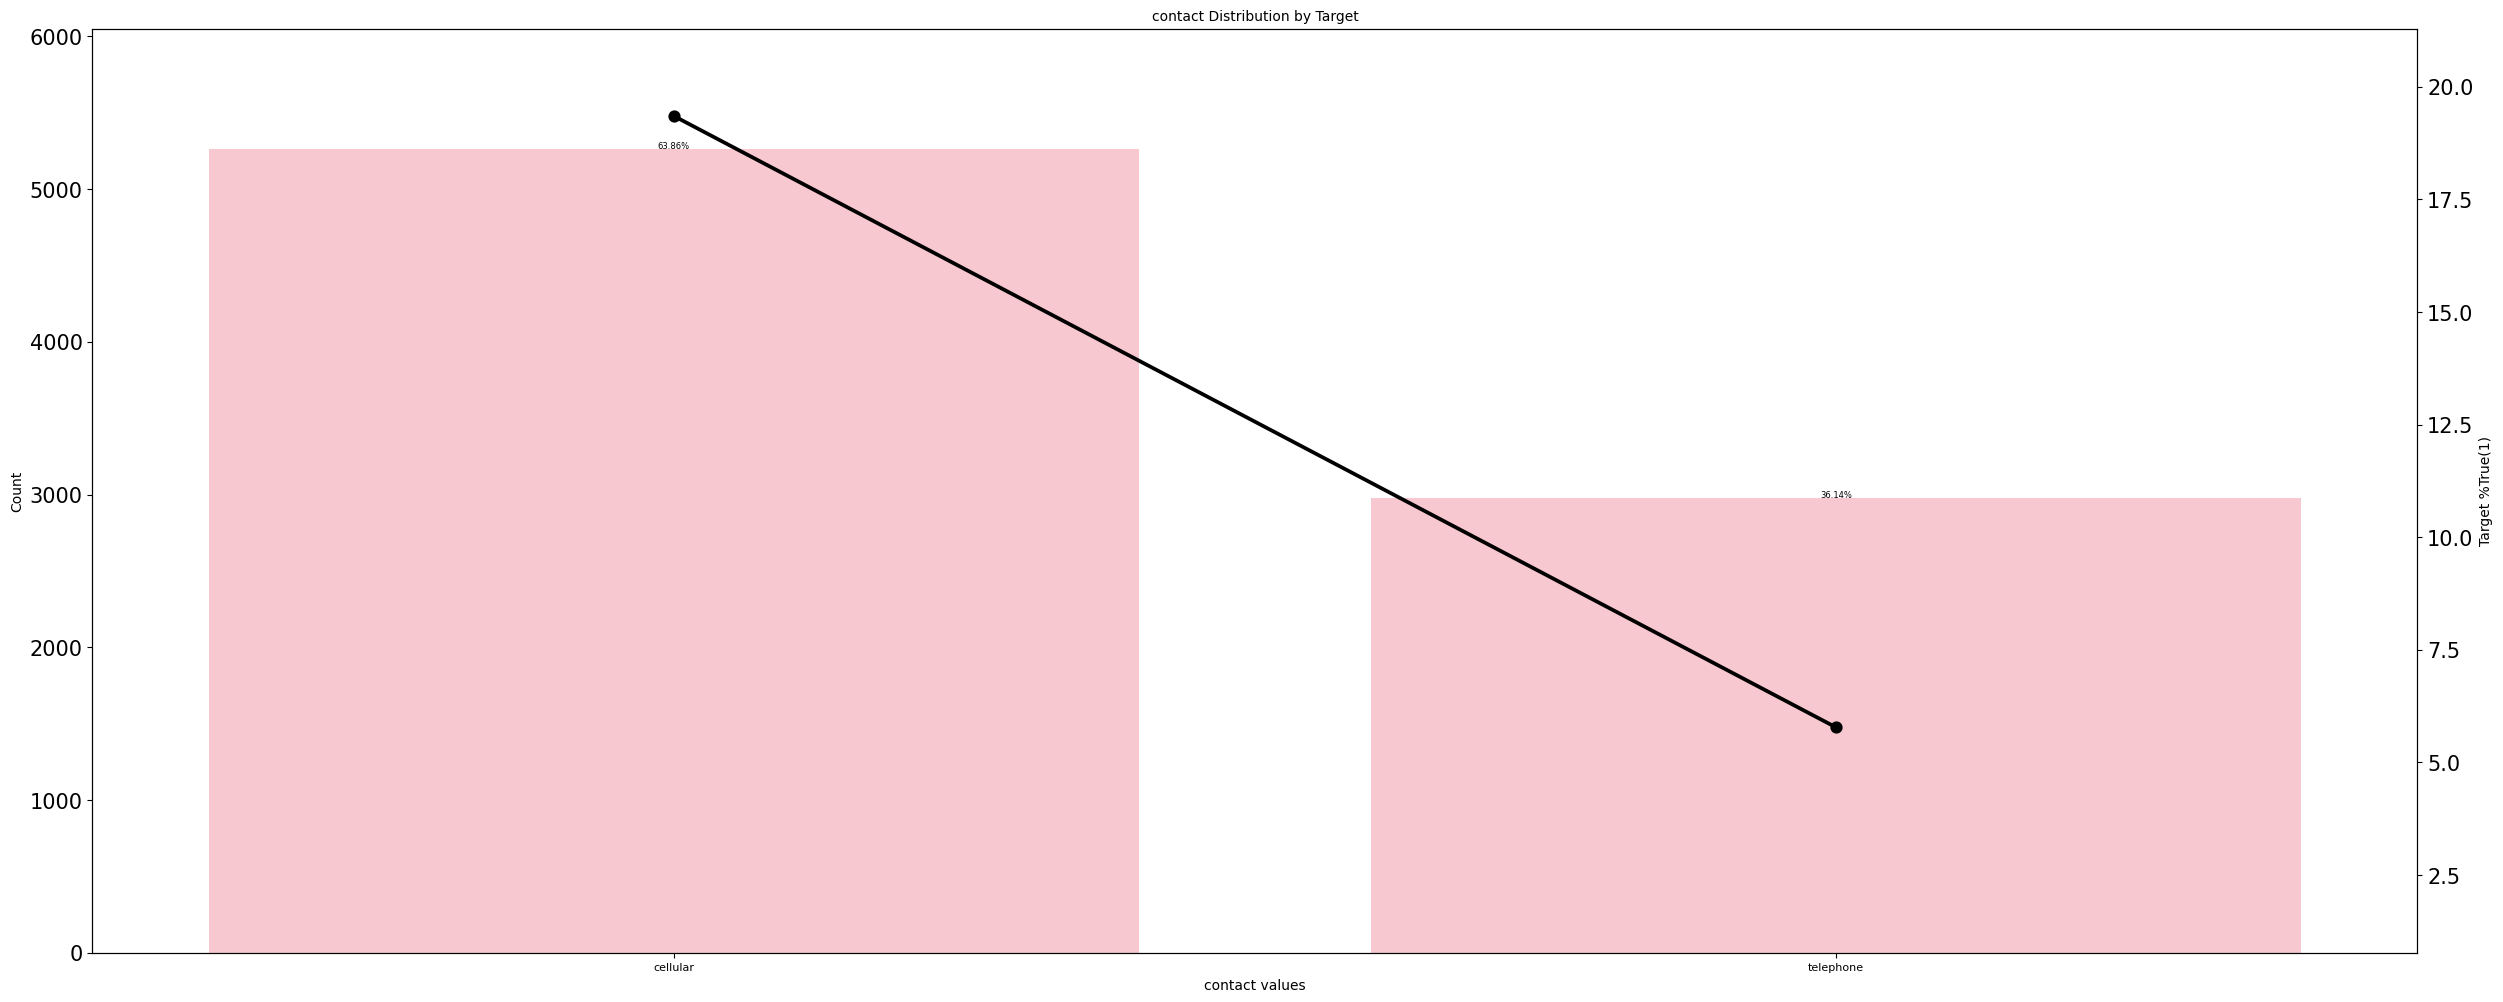

In [ ]:
colss=['contact']
ploting_cat_fet(prediction, colss, vis_row=1, vis_col=1)

As for the contact distribution, the ratio of cellular was higher and the ratio of regular deposit subscriptions was about 20%, which was higher than that of telephones. As for the contact method, cellular is better than telephones.

Scatter plot with regression line

<Axes: xlabel='nr.employed', ylabel='euribor3m'>

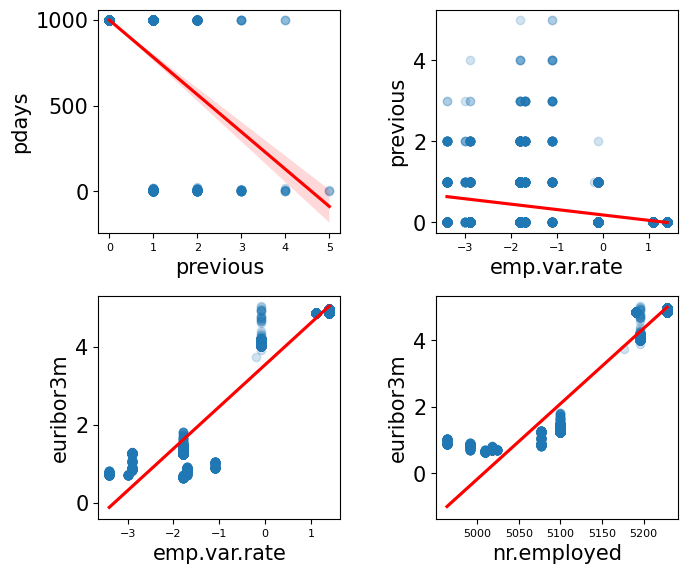

In [ ]:
mpl.rc('font',size=15)
figure, axes = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='previous',y='pdays',data=prediction,ax=axes[0,0],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
sns.regplot(x='emp.var.rate',y='previous',data=prediction,ax=axes[0,1],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
sns.regplot(x='emp.var.rate',y='euribor3m',data=prediction,ax=axes[1,0],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
sns.regplot(x='nr.employed',y='euribor3m',data=prediction,ax=axes[1,1],scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
